In [2]:
%connect_info

{"key":"9fe6c096-8f18-46b2-8ab6-c060aae8e3f2","signature_scheme":"hmac-sha256","transport":"tcp","ip":"127.0.0.1","hb_port":9000,"control_port":9001,"shell_port":9002,"stdin_port":9003,"iopub_port":9004,"kernel_name":"python3112jvsc74a57bd04149aa2f31a7f8b5ff184e82bf464dce73529b69401cc2940ad6232b832b4da8"}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-v34c4a0ac7ca184def078b95e68b73880faa6cabfd.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import sys

%load_ext IPython.extensions.autoreload
%autoreload 2

from hypyp.wavelet.pywt_wavelet import Wavelet
from hypyp.signal import SynteticSignal



Loading pywt from /home/patrice/work/ppsp/pywt/pywt


ninja: error: '/tmp/pip-build-env-61gigug6/overlay/bin/cython', needed by 'pywt/_extensions/_cwt.cpython-311-x86_64-linux-gnu.so.p/_cwt.c', missing and no known rule to make it


10000


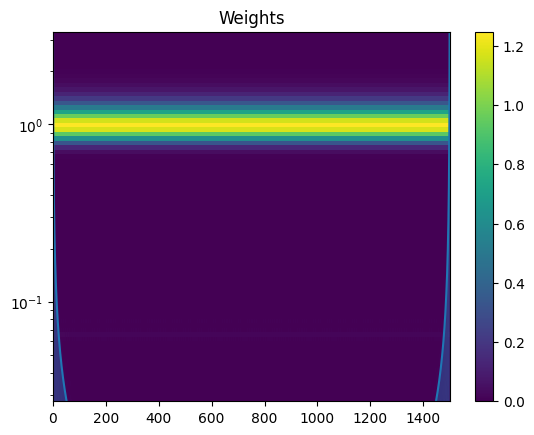

max_id: 21
0.9910059291689355


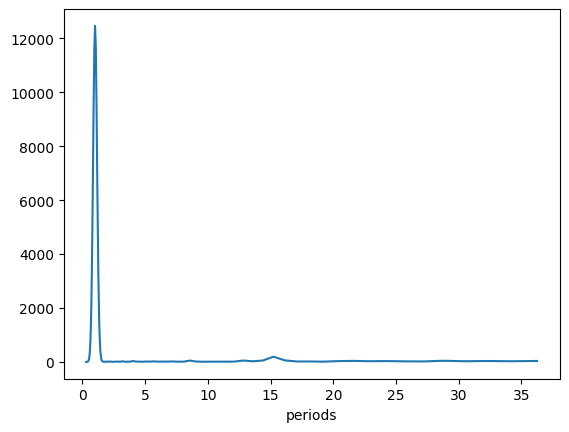

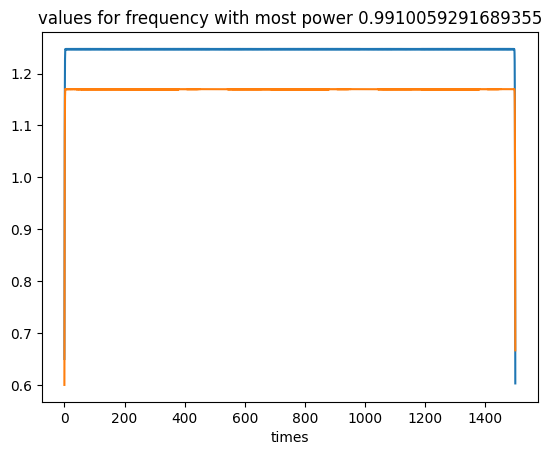

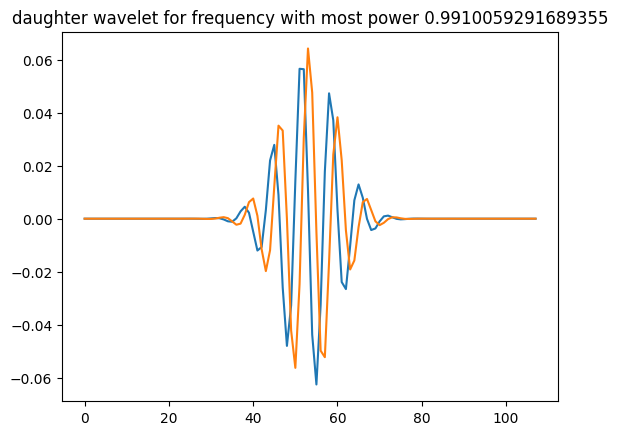

In [23]:
wavelet = Wavelet()
signal = SynteticSignal(tmax=1500).add_sin(1)
#plt.plot(signal.y)
#plt.show()

res = wavelet.cwt(signal.y, signal.period)
res.plot()
plt.show()

max_id = np.argmax(np.sum(np.abs(res.W), axis=1))
print(f'max_id: {max_id}')
print(res.frequencies[max_id])
#plt.plot(res.tracer['psi_scales'][-1])
#plt.plot(signal.y)
plt.show()

#plt.plot(res.frequencies)
#plt.show()
plt.plot(1/res.frequencies, np.sum(np.abs(res.W), axis=1))
plt.xlabel('periods')
plt.show()

plt.plot(res.times, np.abs(res.W[max_id,:]))
plt.plot(res.times, np.abs(res.W[max_id+1,:]))
plt.xlabel('times')
plt.title(f'values for frequency with most power {res.frequencies[max_id]}')
plt.show()

plt.plot(np.real(res.tracer['psi_scales'][max_id]))
plt.plot(np.imag(res.tracer['psi_scales'][max_id]))
plt.title(f'daughter wavelet for frequency with most power {res.frequencies[max_id]}')
plt.show()